In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['voice.csv']


In [2]:
df='../input/voice.csv'
d=pd.read_csv(df)
print(d)

      meanfreq        sd    median   ...     dfrange   modindx   label
0     0.059781  0.064241  0.032027   ...    0.000000  0.000000    male
1     0.066009  0.067310  0.040229   ...    0.046875  0.052632    male
2     0.077316  0.083829  0.036718   ...    0.007812  0.046512    male
3     0.151228  0.072111  0.158011   ...    0.554688  0.247119    male
4     0.135120  0.079146  0.124656   ...    5.476562  0.208274    male
5     0.132786  0.079557  0.119090   ...    2.718750  0.125160    male
6     0.150762  0.074463  0.160106   ...    5.304688  0.123992    male
7     0.160514  0.076767  0.144337   ...    0.531250  0.283937    male
8     0.142239  0.078018  0.138587   ...    2.156250  0.148272    male
9     0.134329  0.080350  0.121451   ...    4.679688  0.089920    male
10    0.157021  0.071943  0.168160   ...    2.804688  0.200000    male
11    0.138551  0.077054  0.127527   ...    2.710938  0.132351    male
12    0.137343  0.080877  0.124263   ...    5.000000  0.088500    male
13    

In [3]:
print(d.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB
None


In [4]:
print(d.head(10))

   meanfreq        sd    median  ...     dfrange   modindx  label
0  0.059781  0.064241  0.032027  ...    0.000000  0.000000   male
1  0.066009  0.067310  0.040229  ...    0.046875  0.052632   male
2  0.077316  0.083829  0.036718  ...    0.007812  0.046512   male
3  0.151228  0.072111  0.158011  ...    0.554688  0.247119   male
4  0.135120  0.079146  0.124656  ...    5.476562  0.208274   male
5  0.132786  0.079557  0.119090  ...    2.718750  0.125160   male
6  0.150762  0.074463  0.160106  ...    5.304688  0.123992   male
7  0.160514  0.076767  0.144337  ...    0.531250  0.283937   male
8  0.142239  0.078018  0.138587  ...    2.156250  0.148272   male
9  0.134329  0.080350  0.121451  ...    4.679688  0.089920   male

[10 rows x 21 columns]


In [5]:
print(d.describe())

          meanfreq           sd     ...           dfrange      modindx
count  3168.000000  3168.000000     ...       3168.000000  3168.000000
mean      0.180907     0.057126     ...          4.994630     0.173752
std       0.029918     0.016652     ...          3.520039     0.119454
min       0.039363     0.018363     ...          0.000000     0.000000
25%       0.163662     0.041954     ...          2.044922     0.099766
50%       0.184838     0.059155     ...          4.945312     0.139357
75%       0.199146     0.067020     ...          6.992188     0.209183
max       0.251124     0.115273     ...         21.843750     0.932374

[8 rows x 20 columns]


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
x = np.array(d.drop(['label'], 1))
y = np.array(d['label'])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.preprocessing import StandardScaler
df=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
X_train=df.fit(X_train)
X_test=df.fit(X_test)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print('Accuracy='+str(accuracy))

Accuracy=0.9148264984227129


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


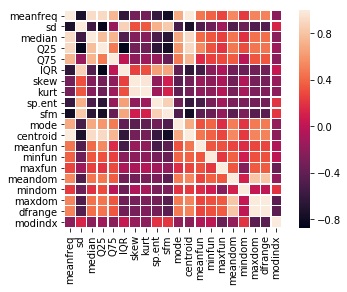

In [11]:
sns.heatmap(d.corr(),linewidths=0.25,vmax=1.0, square=True)